In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

#Step 1 and 2: load the files into pandas:
fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0, nrows=260)
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0, nrows=260)
pop = pd.read_excel('gapminder_population.xlsx', index_col=0, nrows=260)


In [2]:
#Step 3:check the shape :
fert.shape
life.shape
pop.shape

(260, 91)

In [3]:
#Step 4: Look at the columns, check the index and then change it to 'country' and convert 
#table to long format, after having moved the row index into a column, for all data:
fert.columns
fert.columns = fert.columns.astype(int)
fert.index
fert.index.name = 'country'
fert = fert.reset_index()
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
fert

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
56155,Yugoslavia,2015,NaN
56156,Zambia,2015,5.59
56157,Zimbabwe,2015,3.35
56158,Åland,2015,NaN


In [4]:
life.index.name='country'
life=life.reset_index()
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
life

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82
...,...,...,...
56415,Yugoslavia,2016,NaN
56416,Zambia,2016,57.10
56417,Zimbabwe,2016,61.69
56418,Åland,2016,NaN


In [5]:
pop.index.name='country'
pop=pop.reset_index()
pop = pop.melt(id_vars='country', var_name='year', value_name='population')
pop

,country,year,population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0
...,...,...,...
23655,Yugoslavia,Unnamed: 91,NaN
23656,Zambia,Unnamed: 91,NaN
23657,Zimbabwe,Unnamed: 91,NaN
23658,Åland,Unnamed: 91,NaN


In [7]:
#Step 5: merge the dataframes
df = fert.merge(pop)
df_subset = df.merge(life)
df_subset.dropna()

,country,year,fertility_rate,population,life_expectancy
1,Afghanistan,1800,7.00,3280000.0,28.21
3,Albania,1800,4.60,410445.0,35.40
4,Algeria,1800,6.99,2503218.0,28.82
7,Angola,1800,6.93,1567028.0,26.98
9,Antigua and Barbuda,1800,5.00,37000.0,33.54
...,...,...,...,...,...
20969,Vietnam,2015,1.70,93447601.0,75.40
20970,Virgin Islands (U.S.),2015,2.45,106291.0,80.60
20973,Yemen,2015,3.83,26832215.0,66.00
20975,Zambia,2015,5.59,16211767.0,56.70


<AxesSubplot:xlabel='year', ylabel='life_expectancy'>

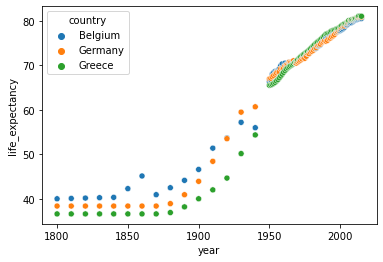

In [8]:
#With all the data merged into a single object, you can now select specific columns and plot them:
df_subset_countries = df_subset.loc[df['country'].isin(['Greece', 'Germany', 'Belgium', 'Bosnia'])]


#Make a scatterplot of the merged dataframe on year and life_expectancy
sns.scatterplot(x='year', y='life_expectancy', hue='country', data=df_subset_countries, alpha=1.0)


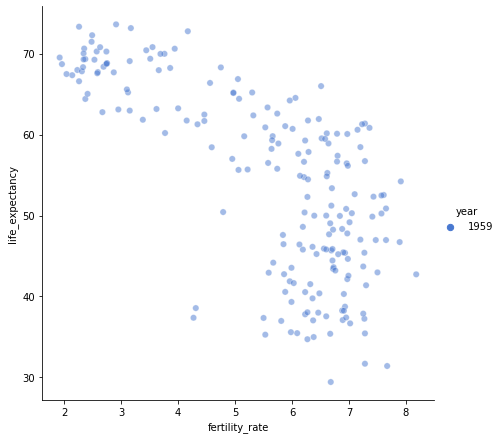

In [9]:
#make a scatterplot showing the correlation between life expectancy and fertility for a specific year
year = df_subset[df_subset['year'] == 1959]
sns.relplot(x='fertility_rate', y='life_expectancy', hue='year', data=year, size="year",
           sizes=(40, 400), alpha=.5, palette="muted",
           height=6)

In [10]:
#Select a year interval from 1960 to 2015 and remove duplicates
years_interval = df_subset.loc[df_subset['year'].between(1960, 2015)].dropna()
years_interval


,country,year,fertility_rate,population,life_expectancy
6476,Afghanistan,1960,7.67,8994793.0,31.94
6478,Albania,1960,6.19,1636054.0,62.87
6479,Algeria,1960,7.65,11124892.0,47.50
6482,Angola,1960,7.32,5270844.0,35.98
6484,Antigua and Barbuda,1960,4.43,54681.0,62.97
...,...,...,...,...,...
20969,Vietnam,2015,1.70,93447601.0,75.40
20970,Virgin Islands (U.S.),2015,2.45,106291.0,80.60
20973,Yemen,2015,3.83,26832215.0,66.00
20975,Zambia,2015,5.59,16211767.0,56.70


In [15]:
#Iterate over the years between 1960 to 2015 and make a plot for each one of them
years = years_interval.year.unique()

for i in years:
    year = df_subset[df_subset['year'] == i] 
    sns.relplot(x='fertility_rate', y='life_expectancy', hue='year', data=year, size='year',
               palette="muted", kind='scatter', sizes=(40, 400), alpha=.5,
               height=4, aspect=1)
    #format() not suitable for savefig()
    plt.savefig(f'plots/lifeexp_{i}.png')
    plt.close()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


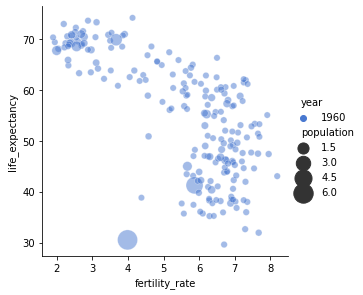

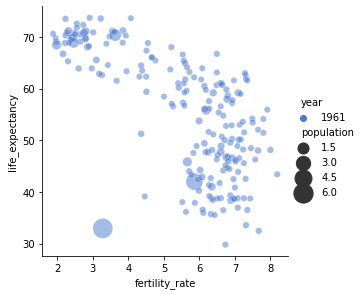

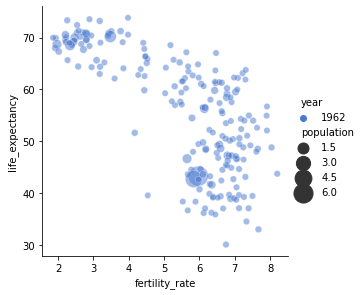

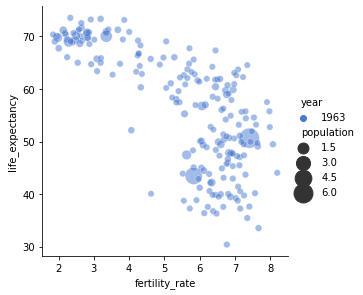

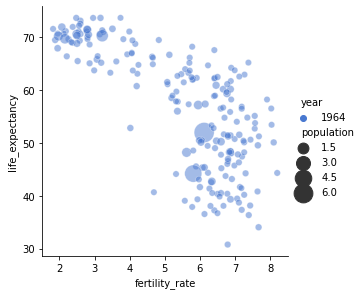

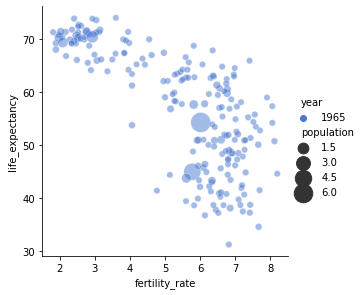

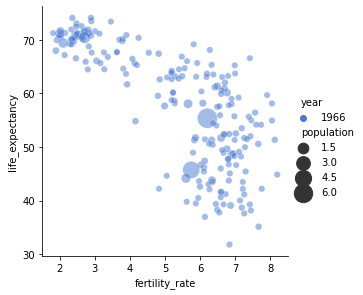

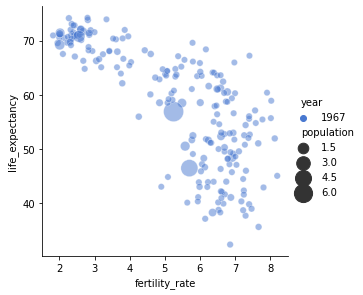

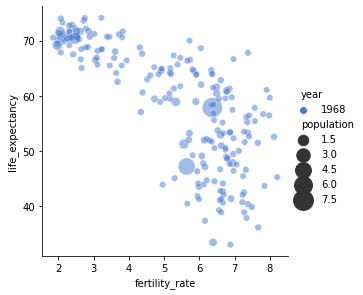

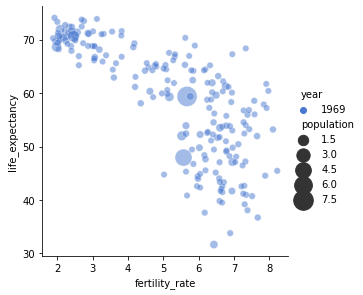

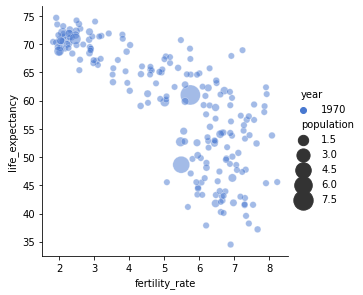

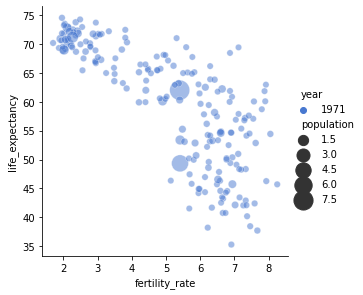

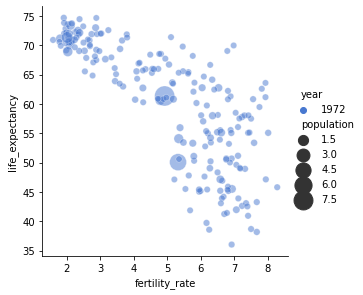

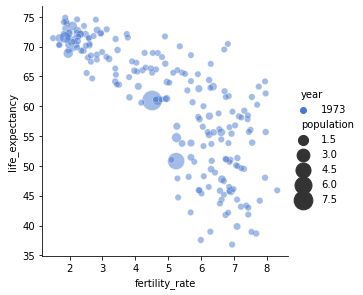

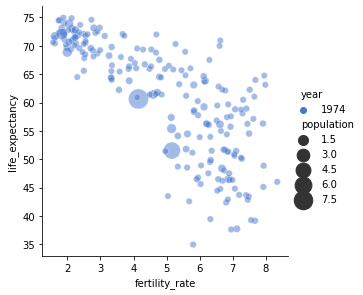

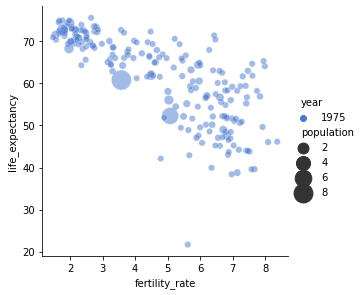

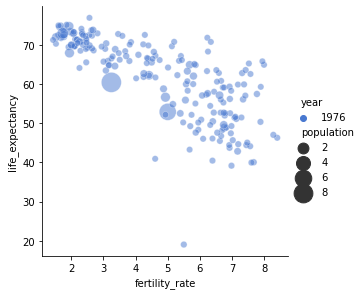

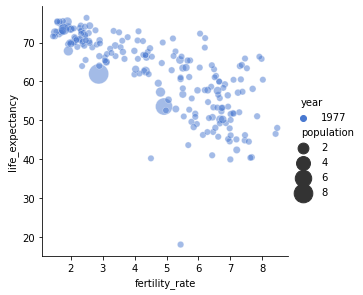

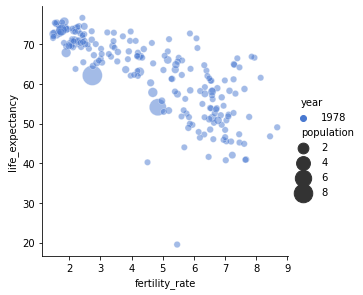

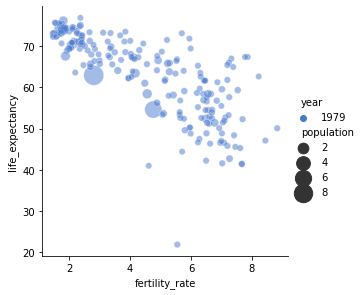

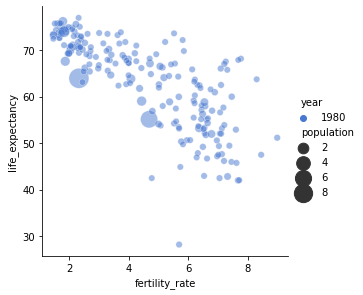

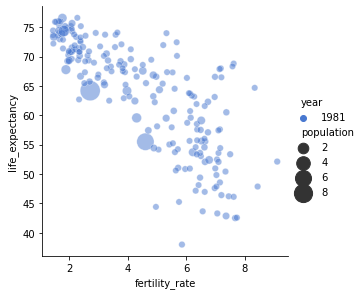

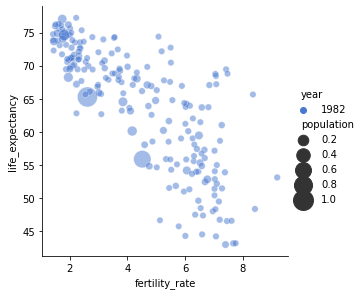

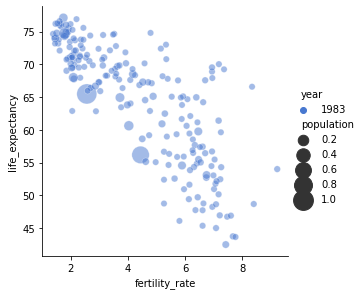

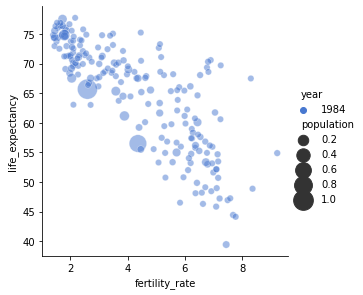

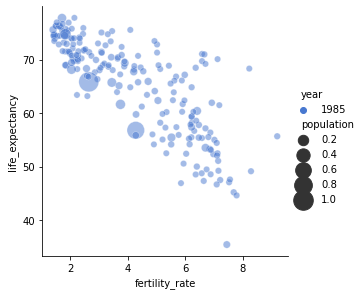

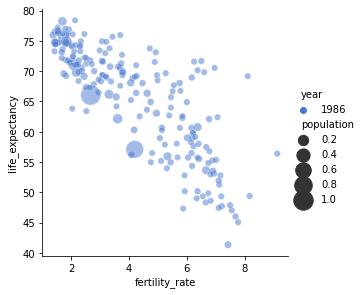

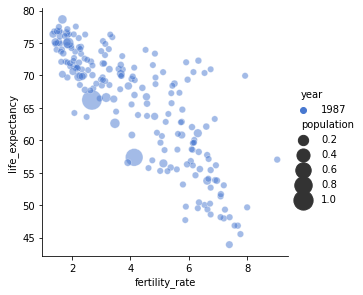

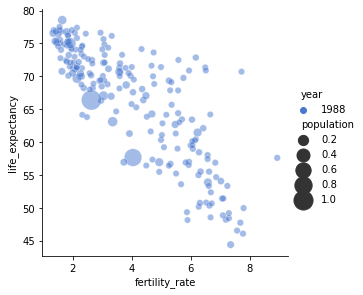

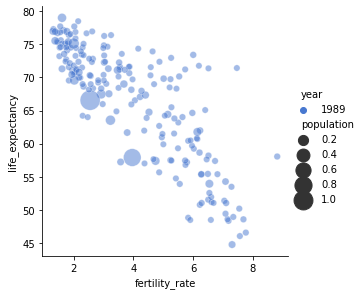

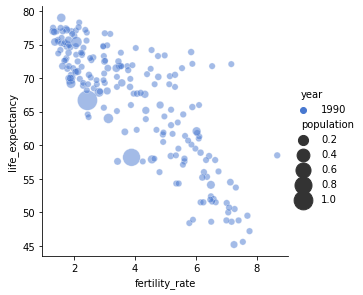

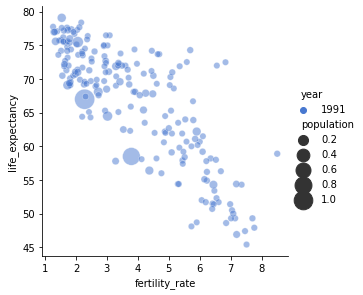

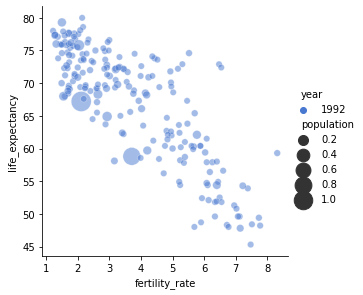

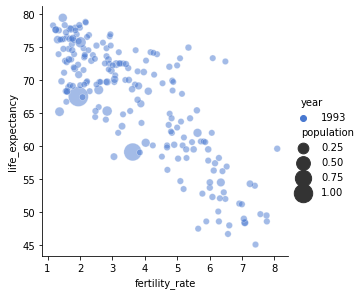

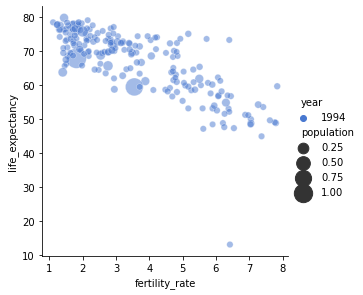

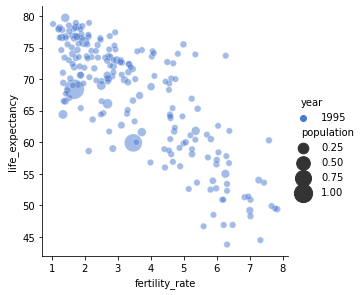

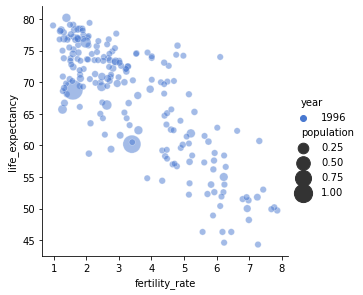

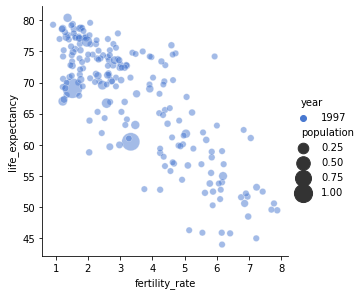

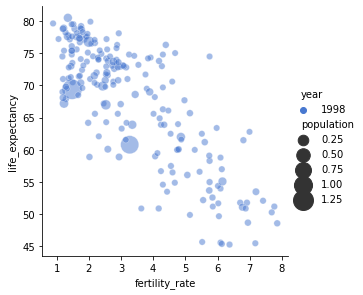

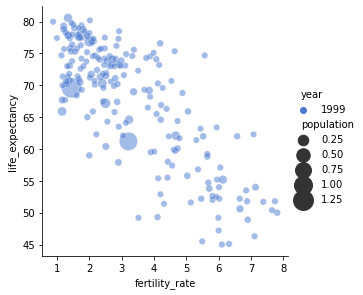

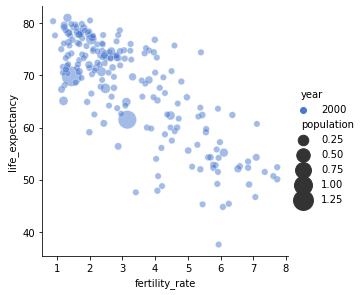

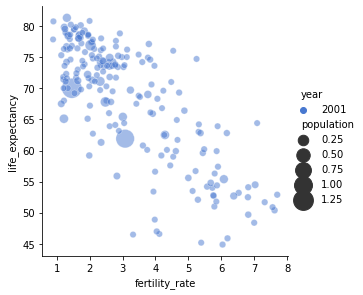

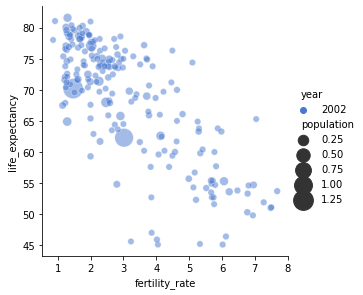

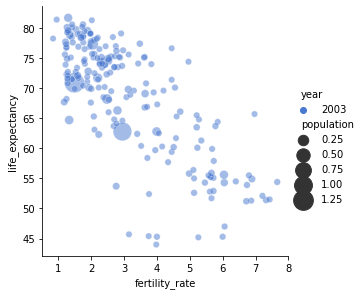

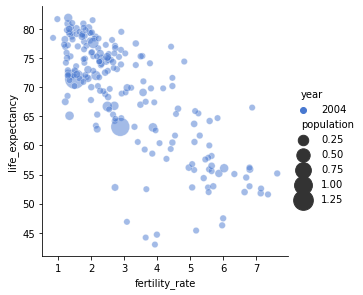

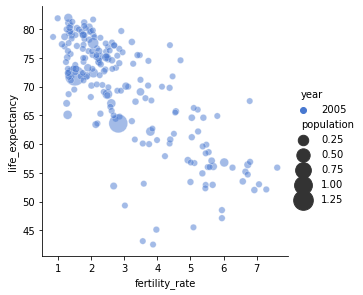

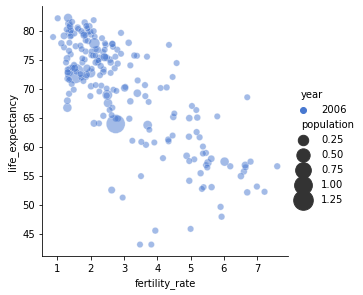

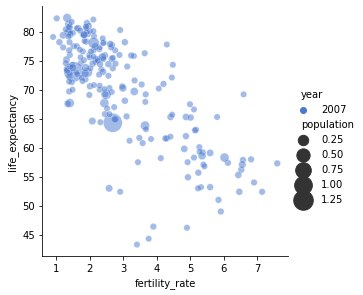

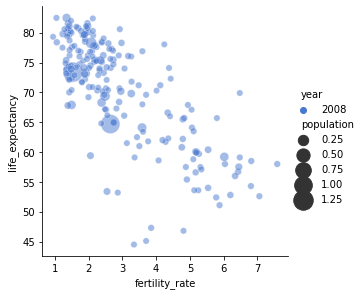

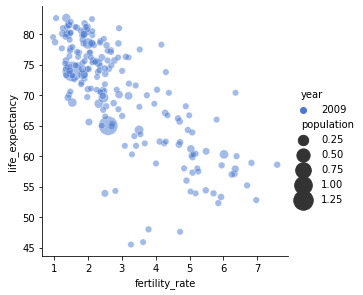

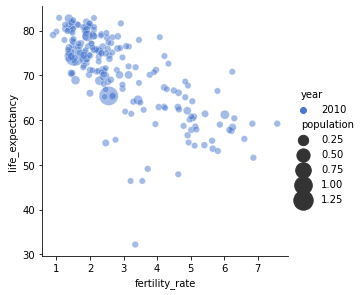

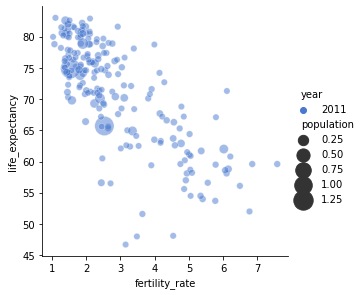

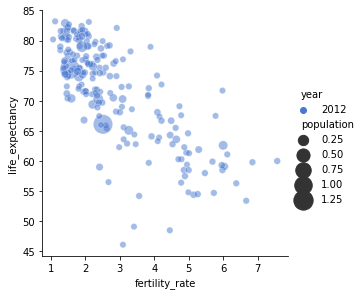

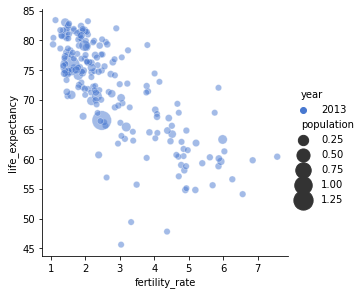

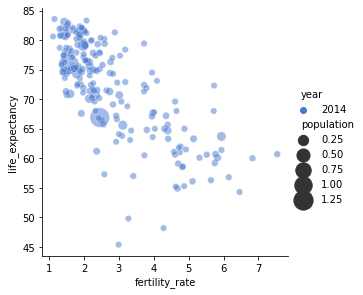

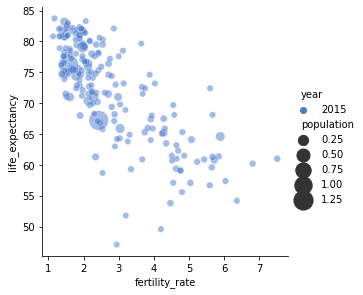

In [16]:
#Do the same iteration but now Add another dimension to the visualization by utilizing 
#the population data.
for i in years:
    year = df_subset[df_subset['year'] == i] 
    sns.relplot(x='fertility_rate', y='life_expectancy', hue='year', data=year, size='population',
               palette="muted", kind='scatter', sizes=(40, 400), alpha=.5,
               height=4, aspect=1)
    plt.savefig(f'plots/lifeexp_{i}.png')
    plt.close()

In [18]:
import imageio

images = []

for x in years:
    filename = 'plots/lifeexp_{}.png'.format(x)
    images.append(imageio.imread(filename))
imageio.mimsave('output.gif', images, fps=20)